In [1]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

In [7]:
from qiskit import QuantumCircuit, Aer, assemble
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex

In [3]:
# set the length of the n-bit input string. 
n = 3

In [4]:
const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw()

q_0: 
     
q_1: 
     
q_2: 
     
q_3:

In [30]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw()

┌───┐ ░                 ░ ┌───┐
q_0: ┤ X ├─░───■─────────────░─┤ X ├
     └───┘ ░   │             ░ └───┘
q_1: ──────░───┼────■────────░──────
     ┌───┐ ░   │    │        ░ ┌───┐
q_2: ┤ X ├─░───┼────┼────■───░─┤ X ├
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░──────
           ░ └───┘└───┘└───┘ ░

In [33]:
dj_circuit = QuantumCircuit(n+1)

for qubit in range(n):
    dj_circuit.h(qubit)

dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.draw()

┌───┐     
q_0: ┤ H ├─────
     ├───┤     
q_1: ┤ H ├─────
     ├───┤     
q_2: ┤ H ├─────
     ├───┤┌───┐
q_3: ┤ X ├┤ H ├
     └───┘└───┘

In [34]:
dj_circuit.barrier()
dj_circuit = dj_circuit.compose(balanced_oracle)
dj_circuit.draw()

┌───┐      ░ ┌───┐ ░                 ░ ┌───┐
q_0: ┤ H ├──────░─┤ X ├─░───■─────────────░─┤ X ├
     ├───┤      ░ └───┘ ░   │             ░ └───┘
q_1: ┤ H ├──────░───────░───┼────■────────░──────
     ├───┤      ░ ┌───┐ ░   │    │        ░ ┌───┐
q_2: ┤ H ├──────░─┤ X ├─░───┼────┼────■───░─┤ X ├
     ├───┤┌───┐ ░ └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_3: ┤ X ├┤ H ├─░───────░─┤ X ├┤ X ├┤ X ├─░──────
     └───┘└───┘ ░       ░ └───┘└───┘└───┘ ░

In [35]:
dj_circuit.barrier()

for qubit in range(n):
    dj_circuit.h(qubit)

dj_circuit.draw()

┌───┐      ░ ┌───┐ ░                 ░ ┌───┐ ░ ┌───┐
q_0: ┤ H ├──────░─┤ X ├─░───■─────────────░─┤ X ├─░─┤ H ├
     ├───┤      ░ └───┘ ░   │             ░ └───┘ ░ ├───┤
q_1: ┤ H ├──────░───────░───┼────■────────░───────░─┤ H ├
     ├───┤      ░ ┌───┐ ░   │    │        ░ ┌───┐ ░ ├───┤
q_2: ┤ H ├──────░─┤ X ├─░───┼────┼────■───░─┤ X ├─░─┤ H ├
     ├───┤┌───┐ ░ └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ░ └───┘
q_3: ┤ X ├┤ H ├─░───────░─┤ X ├┤ X ├┤ X ├─░───────░──────
     └───┘└───┘ ░       ░ └───┘└───┘└───┘ ░       ░

In [36]:
dj_circuit.measure_all()

In [37]:
for i in range(n):
    dj_circuit.measure(i, i)

dj_circuit.draw()

┌───┐      ░ ┌───┐ ░                 ░ ┌───┐ ░ ┌───┐ ░ ┌─┐         ┌─┐»
   q_0: ┤ H ├──────░─┤ X ├─░───■─────────────░─┤ X ├─░─┤ H ├─░─┤M├─────────┤M├»
        ├───┤      ░ └───┘ ░   │             ░ └───┘ ░ ├───┤ ░ └╥┘┌─┐      └╥┘»
   q_1: ┤ H ├──────░───────░───┼────■────────░───────░─┤ H ├─░──╫─┤M├───────╫─»
        ├───┤      ░ ┌───┐ ░   │    │        ░ ┌───┐ ░ ├───┤ ░  ║ └╥┘┌─┐    ║ »
   q_2: ┤ H ├──────░─┤ X ├─░───┼────┼────■───░─┤ X ├─░─┤ H ├─░──╫──╫─┤M├────╫─»
        ├───┤┌───┐ ░ └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ░ └───┘ ░  ║  ║ └╥┘┌─┐ ║ »
   q_3: ┤ X ├┤ H ├─░───────░─┤ X ├┤ X ├┤ X ├─░───────░───────░──╫──╫──╫─┤M├─╫─»
        └───┘└───┘ ░       ░ └───┘└───┘└───┘ ░       ░       ░  ║  ║  ║ └╥┘ ║ »
meas: 4/════════════════════════════════════════════════════════╩══╩══╩══╩══╩═»
                                                                0  1  2  3  0 »
«              
«   q_0: ──────
«        ┌─┐   
«   q_1: ┤M├───
«        └╥┘┌─┐
«   q_2: ─╫─┤M├
«         ║ └╥┘
«   q_3: ─╫──╫─
«         ║  ║ 
«meas: 4/═╩══╩═
«         1  2

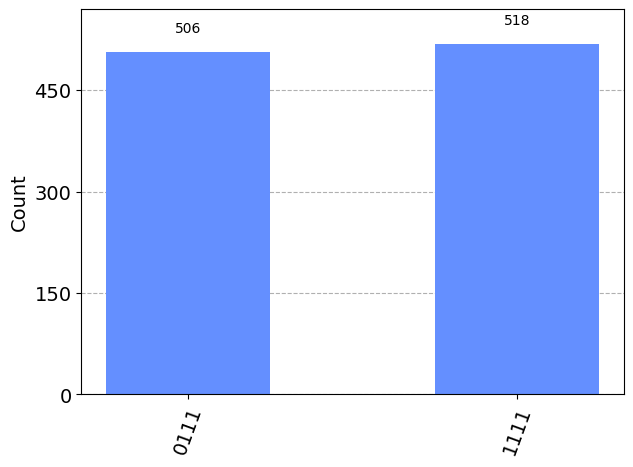

In [38]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
results = aer_sim.run(dj_circuit).result()
answer = results.get_counts()

plot_histogram(answer)